<a href="https://colab.research.google.com/github/Truth300/truth_data/blob/main/Project2_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df=pd.read_csv('/content/natural-gas-consumption-by-zip-code-2010.csv')
df.head()

,Zip Code,Building type,Consumption (therms),Consumption (GJ),Source,Latitude,Longitude
0,10300,Commercial,470.0,50.0,National Grid,NaN,NaN
1,10335,Commercial,647.0,68.0,National Grid,NaN,NaN
2,10360,Large Residential,33762.0,3562.0,National Grid,NaN,NaN
3,11200,Commercial,32125.0,3389.0,National Grid,NaN,NaN
4,11200,Institutional,3605.0,380.0,National Grid,NaN,NaN


In [20]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Zip Code              1015 non-null   int64  
 1   Building type         1015 non-null   object 
 2   Consumption (therms)  1005 non-null   float64
 3   Consumption (GJ)      1005 non-null   float64
 4   Source                1015 non-null   object 
 5   Latitude              964 non-null    float64
 6   Longitude             964 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 55.6+ KB


,Zip Code,Building type,Consumption (therms),Consumption (GJ),Source,Latitude,Longitude
count,1015.000000,1015,1.005000e+03,1.005000e+03,1015,964.000000,964.000000
unique,NaN,6,NaN,NaN,2,NaN,NaN
top,NaN,Commercial,NaN,NaN,ConEd,NaN,NaN
freq,NaN,354,NaN,NaN,518,NaN,NaN
mean,10858.175369,NaN,2.750244e+06,2.901661e+05,NaN,40.727513,-73.912050
std,570.694259,NaN,4.297262e+06,4.533852e+05,NaN,0.080319,0.103042
min,10001.000000,NaN,1.000000e+00,0.000000e+00,NaN,40.508005,-74.242114
25%,10305.500000,NaN,1.643790e+05,1.734300e+04,NaN,40.676945,-73.978075
50%,11209.000000,NaN,1.165816e+06,1.230000e+05,NaN,40.728164,-73.919776
75%,11368.000000,NaN,3.446607e+06,3.636360e+05,NaN,40.774794,-73.841811


In [21]:
df.nunique()

Zip Code                 231
Building type              6
Consumption (therms)    1005
Consumption (GJ)         999
Source                     2
Latitude                 195
Longitude                195
dtype: int64

In [22]:
df.shape

(1015, 7)

In [23]:
df.isna().sum()

Zip Code                 0
Building type            0
Consumption (therms)    10
Consumption (GJ)        10
Source                   0
Latitude                51
Longitude               51
dtype: int64

In [24]:
df['Zip Code'].unique()

array([10300, 10335, 10360, 11200, 11254, 11274, 11279, 11303, 11313,
       11314, 11315, 11323, 11332, 11335, 11337, 11343, 11350, 11388,
       11400, 11402, 11403, 11438, 11441, 11446, 11450, 11468, 11469,
       11472, 11473, 11474, 11475, 11477, 11478, 11479, 11485, 11696,
       10007, 10002, 10012, 10003, 10001, 10013, 10005, 10006, 10010,
       10009, 10011, 10075, 11103, 11105, 11432, 10031, 10466, 10459,
       11413, 10451, 11434, 11209, 10464, 11415, 10302, 11385, 11201,
       11208, 11212, 11001, 11230, 11239, 10305, 10458, 10040, 10080,
       11231, 11377, 11106, 11102, 10027, 11355, 10465, 10039, 11361,
       10467, 10034, 10307, 10029, 11429, 11416, 11362, 11366, 11207,
       11004, 11375, 11220, 11367, 11374, 11222, 11418, 10474, 10308,
       10452, 11356, 10021, 11238, 11419, 10038, 10014, 10469, 11365,
       10024, 11368, 11040, 11215, 11357, 11378, 10030, 11206, 11218,
       11372, 11421, 10128, 11426, 10025, 10018, 11364, 10069, 11412,
       10306, 10468,

In [25]:
df['Building type'].unique()

array(['Commercial', 'Large Residential', 'Institutional',
       'Small Residential', 'Industrial', 'Residential'], dtype=object)

In [26]:
df['Source'].unique()

array(['National Grid', 'ConEd'], dtype=object)

In [27]:
duplicates = df[df.duplicated(['Zip Code'])]
duplicates

,Zip Code,Building type,Consumption (therms),Consumption (GJ),Source,Latitude,Longitude
4,11200,Institutional,3605.0,380.0,National Grid,NaN,NaN
5,11200,Small Residential,3960.0,418.0,National Grid,NaN,NaN
9,11279,Large Residential,301.0,32.0,National Grid,NaN,NaN
11,11303,Small Residential,3009.0,317.0,National Grid,NaN,NaN
15,11315,Institutional,339.0,36.0,National Grid,NaN,NaN
...,...,...,...,...,...,...,...
1010,11367,Residential,2905831.0,306581.0,ConEd,40.730323,-73.826106
1011,10457,Residential,1697773.0,179125.0,ConEd,40.845798,-73.898324
1012,10461,Large Residential,9651221.0,1018258.0,ConEd,40.846961,-73.840633
1013,11420,Commercial,8380985.0,884241.0,National Grid,40.673345,-73.817707


In [28]:
df[df.duplicated()].shape

(0, 7)

In [29]:
data=df.drop_duplicates()
data.shape

(1015, 7)

In [30]:
df1=data.fillna(method='bfill')
df1.isna().sum()
df1.head(1)

,Zip Code,Building type,Consumption (therms),Consumption (GJ),Source,Latitude,Longitude
0,10300,Commercial,470.0,50.0,National Grid,40.713631,-74.009131


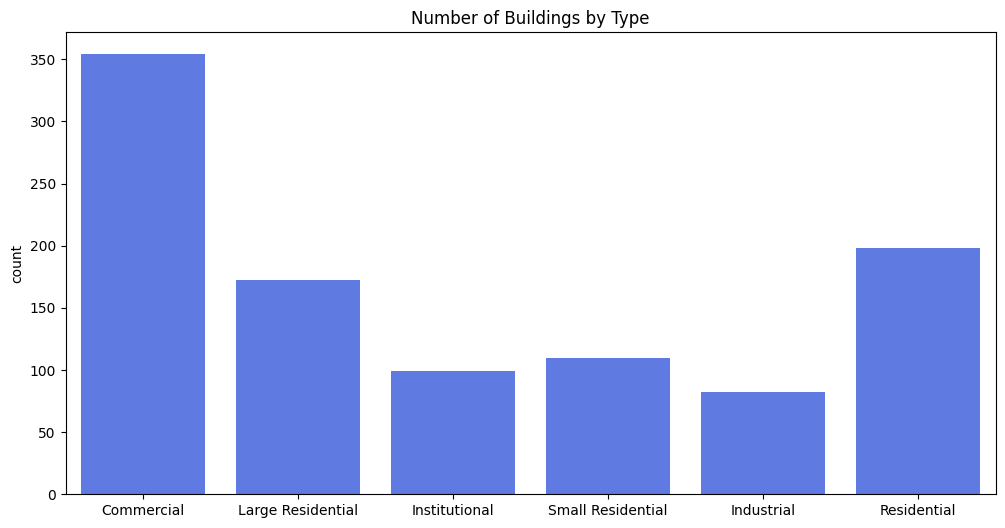

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(data=df1, x='Building type', color='#496DF5')
plt.title("Number of Buildings by Type")
plt.xlabel(None)
plt.show()

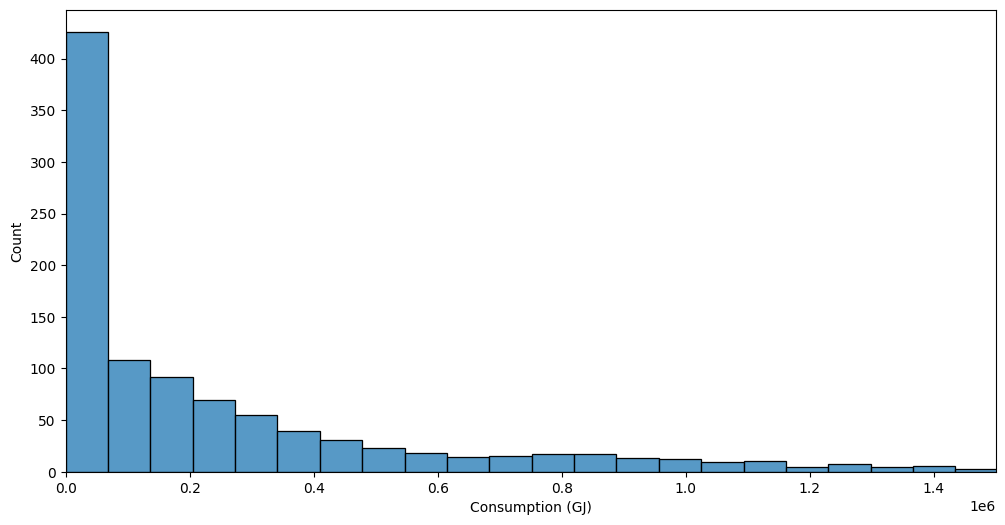

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(data=df1, x='Consumption (GJ)')
plt.xlim([0,1_500_000])
plt.show()

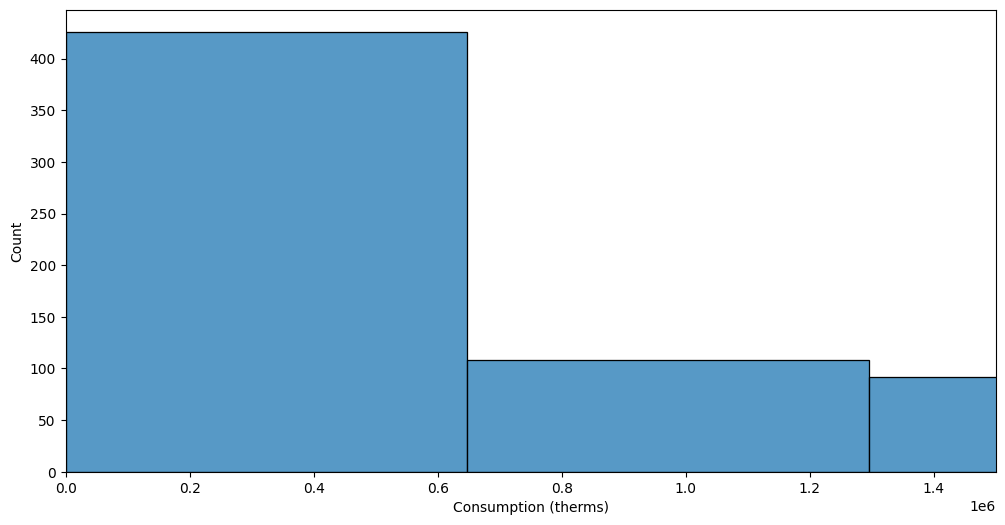

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(data=df1, x='Consumption (therms)')
plt.xlim([0,1_500_000])
plt.show()

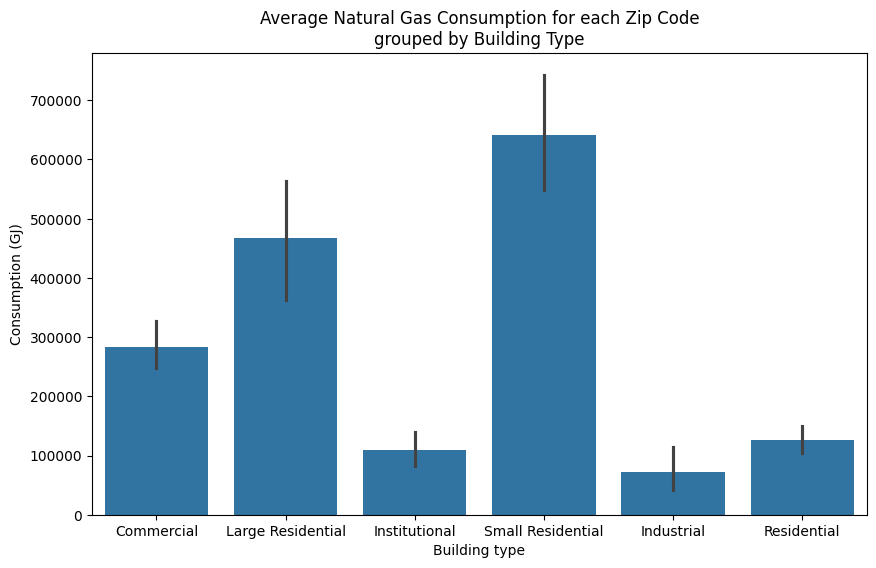

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(data=df1, x='Building type', y='Consumption (GJ)')
plt.title('Average Natural Gas Consumption for each Zip Code\ngrouped by Building Type')
#plt.xlabel(None)
plt.show()

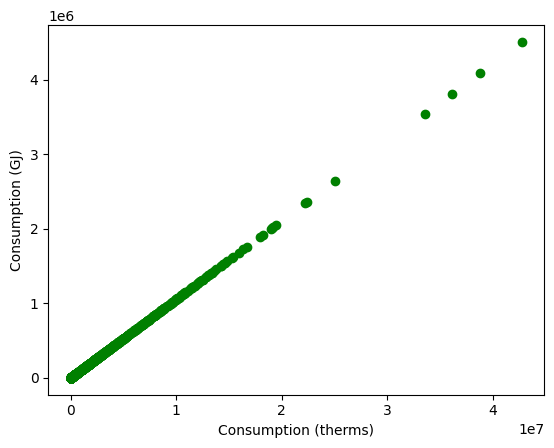

In [37]:
plt.scatter(df1['Consumption (therms)'],df1['Consumption (GJ)'],color='Green')
plt.xlabel('Consumption (therms)')
plt.ylabel('Consumption (GJ)')
plt.show()

In [36]:
count=[df1['Consumption (therms)'],df1['Consumption (GJ)']]
for i in count:
    print(i.value_counts())

Consumption (therms)
6691.0        2
3374658.0     2
628133.0      2
1795744.0     2
4023498.0     2
             ..
981522.0      1
2807970.0     1
2212791.0     1
263276.0      1
13811460.0    1
Name: count, Length: 1005, dtype: int64
Consumption (GJ)
219.0        3
103805.0     2
424502.0     2
34925.0      2
66272.0      2
            ..
296257.0     1
233462.0     1
27777.0      1
84942.0      1
1457186.0    1
Name: count, Length: 999, dtype: int64


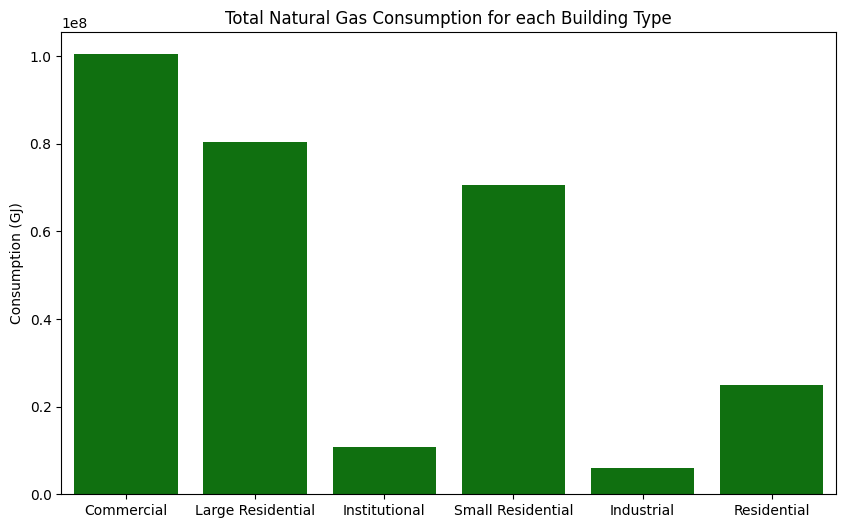

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(data=df1, x='Building type', y='Consumption (GJ)', estimator=np.sum, errorbar=None, color='green')
plt.title('Total Natural Gas Consumption for each Building Type')
plt.xlabel(None)
plt.show()

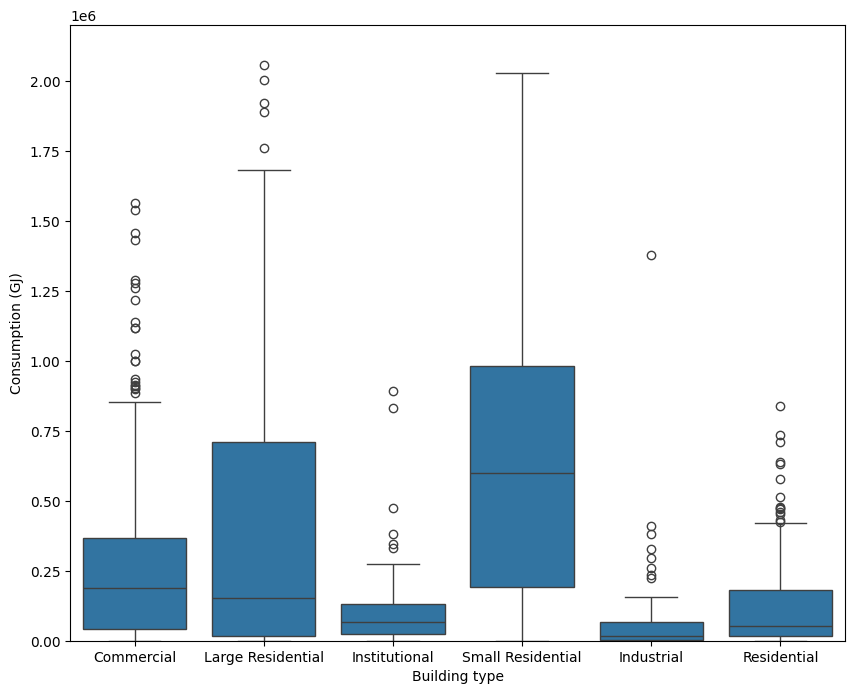

In [39]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df1, x='Building type', y='Consumption (GJ)')
plt.ylim([0, 2_200_000])
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(df,
                       lat="Latitude",
                       lon="Longitude",
                        )

fig.update_layout(mapbox_style='open-street-map')
fig.show()

In [42]:
df1.columns

Index(['Zip Code', 'Building type', 'Consumption (therms)', 'Consumption (GJ)',
       'Source', 'Latitude', 'Longitude'],
      dtype='object')